In [56]:
from qiskit.circuit.library import EfficientSU2
from qiskit import QuantumCircuit

In [57]:
ansatz = EfficientSU2(4, reps=2)
ansatz.decompose().draw()

┌──────────┐┌──────────┐                                ┌──────────┐»
q_0: ┤ Ry(θ[0]) ├┤ Rz(θ[4]) ├────────────────────────■───────┤ Ry(θ[8]) ├»
     ├──────────┤├──────────┤                      ┌─┴─┐     ├──────────┤»
q_1: ┤ Ry(θ[1]) ├┤ Rz(θ[5]) ├───────────■──────────┤ X ├─────┤ Ry(θ[9]) ├»
     ├──────────┤├──────────┤         ┌─┴─┐    ┌───┴───┴───┐┌┴──────────┤»
q_2: ┤ Ry(θ[2]) ├┤ Rz(θ[6]) ├──■──────┤ X ├────┤ Ry(θ[10]) ├┤ Rz(θ[14]) ├»
     ├──────────┤├──────────┤┌─┴─┐┌───┴───┴───┐├───────────┤└───────────┘»
q_3: ┤ Ry(θ[3]) ├┤ Rz(θ[7]) ├┤ X ├┤ Ry(θ[11]) ├┤ Rz(θ[15]) ├─────────────»
     └──────────┘└──────────┘└───┘└───────────┘└───────────┘             »
«     ┌───────────┐                          ┌───────────┐┌───────────┐
«q_0: ┤ Rz(θ[12]) ├───────────────────■──────┤ Ry(θ[16]) ├┤ Rz(θ[20]) ├
«     ├───────────┤                 ┌─┴─┐    ├───────────┤├───────────┤
«q_1: ┤ Rz(θ[13]) ├──────■──────────┤ X ├────┤ Ry(θ[17]) ├┤ Rz(θ[21]) ├
«     └───────────┘    ┌─┴─┐    ┌───┴───┴───┐├───────────┤└───────────┘
«q_2: ──────■──────────┤ X ├────┤ Ry(θ[18]) ├┤ Rz(θ[22]) ├─────────────
«         ┌─┴─┐    ┌───┴───┴───┐├───────────┤└───────────┘             
«q_3: ────┤ X ├────┤ Ry(θ[19]) ├┤ Rz(θ[23]) ├──────────────────────────
«         └───┘    └───────────┘└───────────┘

In [58]:
nodes = ansatz.decompose().draw().nodes

In [59]:
for n in nodes:
    print(len(n))

4
4
1
2
3
3
3
2
3
3
2


In [60]:
nodes[0]

[DAGOpNode(op=Instruction(name='ry', num_qubits=1, num_clbits=0, params=[ParameterVectorElement(θ[0])]), qargs=(Qubit(QuantumRegister(4, 'q'), 0),), cargs=()),
 DAGOpNode(op=Instruction(name='ry', num_qubits=1, num_clbits=0, params=[ParameterVectorElement(θ[1])]), qargs=(Qubit(QuantumRegister(4, 'q'), 1),), cargs=()),
 DAGOpNode(op=Instruction(name='ry', num_qubits=1, num_clbits=0, params=[ParameterVectorElement(θ[2])]), qargs=(Qubit(QuantumRegister(4, 'q'), 2),), cargs=()),
 DAGOpNode(op=Instruction(name='ry', num_qubits=1, num_clbits=0, params=[ParameterVectorElement(θ[3])]), qargs=(Qubit(QuantumRegister(4, 'q'), 3),), cargs=())]

In [6]:
node = nodes[0][0]

In [7]:
import re
def extract_numbers(qubit_string):
    # Define a regular expression pattern to match the numbers in the string
    pattern = r"Qubit\(QuantumRegister\((\d+), '[a-zA-Z]'\), (\d+)\)"
    
    # Use re.search to find the first match of the pattern in the string
    match = re.search(pattern, qubit_string)
    
    # If a match is found, extract the numbers and convert them to integers
    if match:
        register_number = int(match.group(1))
        qubit_index = int(match.group(2))
        return register_number, qubit_index
    else:
        raise ValueError("The input string does not match the expected format")


In [75]:
def get_info_node(node):
    name = node.name
    num_qubits = node.op.num_qubits 
    params = [q.name for q in node.op.params]
    qubit_loc = [extract_numbers(str(q))[1] for q in node.qargs]
    return name, num_qubits, params, qubit_loc

In [76]:
nodes[1][0]

DAGOpNode(op=Instruction(name='rz', num_qubits=1, num_clbits=0, params=[ParameterVectorElement(θ[4])]), qargs=(Qubit(QuantumRegister(4, 'q'), 0),), cargs=())

In [77]:
for node in nodes:
    for n in node:
        print(get_info_node(n), end="\t ,")
    print("")

('ry', 1, ['θ[0]'], [0])	 ,('ry', 1, ['θ[1]'], [1])	 ,('ry', 1, ['θ[2]'], [2])	 ,('ry', 1, ['θ[3]'], [3])	 ,
('rz', 1, ['θ[4]'], [0])	 ,('rz', 1, ['θ[5]'], [1])	 ,('rz', 1, ['θ[6]'], [2])	 ,('rz', 1, ['θ[7]'], [3])	 ,
('cx', 2, [], [2, 3])	 ,
('cx', 2, [], [1, 2])	 ,('ry', 1, ['θ[11]'], [3])	 ,
('cx', 2, [], [0, 1])	 ,('ry', 1, ['θ[10]'], [2])	 ,('rz', 1, ['θ[15]'], [3])	 ,
('ry', 1, ['θ[8]'], [0])	 ,('ry', 1, ['θ[9]'], [1])	 ,('rz', 1, ['θ[14]'], [2])	 ,
('rz', 1, ['θ[12]'], [0])	 ,('rz', 1, ['θ[13]'], [1])	 ,('cx', 2, [], [2, 3])	 ,
('cx', 2, [], [1, 2])	 ,('ry', 1, ['θ[19]'], [3])	 ,
('cx', 2, [], [0, 1])	 ,('ry', 1, ['θ[18]'], [2])	 ,('rz', 1, ['θ[23]'], [3])	 ,
('ry', 1, ['θ[16]'], [0])	 ,('ry', 1, ['θ[17]'], [1])	 ,('rz', 1, ['θ[22]'], [2])	 ,
('rz', 1, ['θ[20]'], [0])	 ,('rz', 1, ['θ[21]'], [1])	 ,


In [120]:
%%python

import tkinter as tk
#from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from qiskit import QuantumCircuit
from qiskit.circuit.library import EfficientSU2

import re
def extract_numbers(qubit_string):
    # Define a regular expression pattern to match the numbers in the string
    pattern = r"Qubit\(QuantumRegister\((\d+), '[a-zA-Z]'\), (\d+)\)"
    
    # Use re.search to find the first match of the pattern in the string
    match = re.search(pattern, qubit_string)
    
    # If a match is found, extract the numbers and convert them to integers
    if match:
        register_number = int(match.group(1))
        qubit_index = int(match.group(2))
        return register_number, qubit_index
    else:
        raise ValueError("The input string does not match the expected format")

def get_info_node(node):
    name = node.name
    num_qubits = node.op.num_qubits, 
    params = [q.name for q in node.op.params]
    qubit_loc = [extract_numbers(str(q)) for q in node.qargs]
    return name, num_qubits, params, qubit_loc
    
style_dict = {
    "H":{
        "bg": "red",
        "tc": "black",
    },
    "RX":{
        "bg": "blue",
        "tc": "white"
    },
    "U":{
        "bg": "yellow",
        "tc": "black"
    }
}
class CircuitCanvas(tk.Canvas):
    def __init__(self, master=None, **kwargs):
        super().__init__(master, **kwargs)
        self.pack(side=tk.LEFT)

        self.loc = [100, 90]
        self.d = 40

        self.nodes =[]
        self.draw_sample()
    def set_dim(self, x0, y0, dd =30):
        self.loc = [x0, y0]
        self.d = dd
    #def draw_circuit_node(self, qnodes):
    #    for node in qnodes:
    #        name, n_q, params, qub_loc = get_info_node(qnode)
    #    for 
        
    def draw_sample(self):
        dx, dy = self.loc

        self.create_line(100, dy, 100+dx, dy,fill="black")
        self.create_line(100, dy+self.d, 100+dx, dy+self.d,fill="black")
        self.create_line(100, dy+2*self.d, 100+dx, dy+2*self.d,fill="black")
        self.create_line(100, dy+3*self.d, 100+dx, dy+3*self.d,fill="black")

        #rdx = 50
        #id = self.create_rectangle(150-rdx/2, 3*dy-rdx/2, 150+rdx/2, 3*dy+rdx/2, fill="black")
        self.gate((dx, dy), "H", "red")
        self.param_gate((dx+self.d, dy), "RX", "Ψ[0]", "red")
        self.gate((dx, dy+self.d), "H", "pink")

        
        self.multi_gate((dx+self.d, dy+self.d), 3, "U", "blue", 3)
        self.gate((dx+self.d, dy+self.d), "H", "pink")
        self.gate((dx+2*self.d, dy+self.d), "H", "pink")
        self.gate((dx+3*self.d, dy+self.d), "H", "pink")


        self.gate((dx+self.d,   dy+3*self.d), "H", "pink")
        self.gate((dx+2*self.d, dy+3*self.d), "H", "pink")
        self.gate((dx+3*self.d, dy+3*self.d), "H", "pink")
        self.cgate(
            (dx+4*self.d, dy+self.d), 
            (dx+4*self.d, dy+2*self.d), 
            (True,[(dx+4*self.d, dy+2*self.d), "⊕", "white", 30, False]),
            cont_type = 1
        )
        self.cgate(
            (dx+5*self.d, dy-self.d), 
            (dx+5*self.d, dy+2*self.d), 
            (True,[(dx+5*self.d, dy+2*self.d), "⊕", "white", 30, False]),
            cont_type = 0
        )
    def draw_circuit(self, nodes):
        x, y = self.loc
        for node in nodes:
            for n in node:
                name, qubits, params, loc = get_info_node(n)
                if name[0] == "c":
                    self.cgate(
                        (x0, y0),
                        (x1, y1),
                        (),
                        cont_type=0
                    )
                elif qubits==1:
                    self.gate((x,y), name, )
                else:
                    self.multi_gate()
            x += self.d

    print("")
    #------
    def gate(self, loc, text, color, font_size = 15, bg=True):
        x, y = loc
        dd = self.d/2
        gate_id = {
            "type": "single",
            "rec": self.create_rectangle(x-dd, y+dd, x+dd, y-dd, fill=color) if bg else None, 
            "text": self.create_text(x, y, text=text, font=('Helvetica', font_size), fill='black'),
            "params": (loc, text, color, font_size, bg)
            }
        return gate_id
    def param_gate(self, loc, text, param, color, font_size = 15, bg=True):
        x, y = loc
        dd = self.d/2
        gate_id = {
            "type": "param_single",
            "rec": self.create_rectangle(x-dd, y+dd, x+dd, y-dd, fill=color) if bg else None, 
            "text":  self.create_text(x, y-dd/4, text=text, font=('Helvetica', int(font_size/1.2)), fill='black'),
            "param": self.create_text(x, y+dd/2, text=param, font=('Helvetica', int(font_size/1.3)), fill='black'),
            "param": (loc, text, param, color, font_size, bg)
            }
        return gate_id   
    def multi_gate(self, loc, num, text, color, space=1, font_size = 15, bg=True):
        x, y = loc
        dd = self.d/2
        gate_id = {
            "type": "multi",
            "rec":self.create_rectangle(x-dd, y+dd+(num-1)*self.d, x+space*self.d -dd, y-dd, fill=color), 
            "text": self.create_text(x+space*self.d/2 -dd, y+(num-1)*self.d/2, text=text, font=('Helvetica', 15), fill='black'),
            "param": (loc, num, text, color, 1, font_size, bg)
            }
        return gate_id
    def cgate(self, loc, tloc, gate_pack, cont_type=0):
        x, y = loc
        xt, yt = tloc
        dd = self.d/6
        fill_type = "black" if cont_type==0 else "white"

        line_id = self.create_line(x, y, xt, yt,fill="black")
        g_type, args = gate_pack
        gate_id = {
            "type": "control",
            "ctrl": self.create_oval(x-dd, y-dd, x+dd, y+dd, fill=fill_type, outline="black"),
            "line": line_id,
            "subgate": self.gate(*args) if g_type else self.multi_gate(*args) ,
            "param": (loc, tloc, gate_pack, cont_type)
        }
        return gate_id

# Create the main window
root = tk.Tk()
root.title("Ising VQA")

casnvas_frame = tk.LabelFrame(root, text="Graph Canvas", relief="solid", bd=2)
casnvas_frame.pack(side=tk.LEFT, fill=tk.Y)
canvas = CircuitCanvas(casnvas_frame, width=400, height=400, bg="white")

ansatz = EfficientSU2(4, reps=2)
nodes = ansatz.decompose().draw().nodes
#canvas.draw_circuit(nodes)

root.mainloop()

In [177]:
%%python

import tkinter as tk
from tkinter import Scrollbar
from tkinter import Event
import random
from qiskit.circuit.library import EfficientSU2
import re

def extract_numbers(qubit_string):
    pattern = r"Qubit\(QuantumRegister\((\d+), '[a-zA-Z]'\), (\d+)\)"
    match = re.search(pattern, qubit_string)
    if match:
        register_number = int(match.group(1))
        qubit_index = int(match.group(2))
        return register_number, qubit_index
    else:
        raise ValueError("The input string does not match the expected format")

def get_info_node(node):
    name = node.name
    num_qubits = node.op.num_qubits 
    params = [q.name for q in node.op.params]
    qubit_loc = [extract_numbers(str(q))[1] for q in node.qargs]
    return name, num_qubits, params, qubit_loc


# Style 

style_gate = {
    "h":{
        "bg": "red",
        "tc": "black",
    },
    "rx":{
        "bg": "blue",
        "tc": "white"
    },
    "ry":{
        "bg": "cyan",
        "tc": "white"
    },
    "rz":{
        "bg": "pink",
        "tc": "white"
    },
    "u":{
        "bg": "yellow",
        "tc": "black"
    }
}

class CircuitCanvas(tk.Canvas):
    def __init__(self, master=None, **kwargs):
        super().__init__(master, **kwargs)
        self.pack(side=tk.LEFT)
        self.loc = [100, 90]
        self.d = 40
        self.nodes = []
        self.gates = []
        self.param_index = []
        #self.draw_sample()
        self.configure(scrollregion=self.bbox("all"))
        
        # Adding scrollbars
        self.hbar = Scrollbar(master, orient=tk.HORIZONTAL, command=self.xview)
        self.hbar.pack(side=tk.BOTTOM, fill=tk.X)
        self.configure(xscrollcommand=self.hbar.set)

        self.vbar = Scrollbar(master, orient=tk.VERTICAL, command=self.yview)
        self.vbar.pack(side=tk.RIGHT, fill=tk.Y)
        self.configure(yscrollcommand=self.vbar.set)

        # Mouse zoom 
        self.bind("<MouseWheel>", self.zoom)
        self.scale_factor = 1.0

    def zoom(self, event: Event):
        scale = 1.0
        if event.delta > 0:
            scale = 1.1
            self.scale_factor *= scale
        elif event.delta < 0:
            scale = 0.9
            self.scale_factor *= scale

        self.scale("all", event.x, event.y, scale, scale)
        self.configure(scrollregion=self.bbox("all"))

    def set_dim(self, x0, y0, dd=30):
        self.loc = [x0, y0]
        self.d = dd

    def cal_loc(self, i, j):
        x0, y0 = self.loc

        x = x0+i*self.d
        y = y0+j*self.d
        return x, y
    def draw_circuit(self, nodes):
        x, y = self.loc
        qubits = extract_numbers(str(nodes[0][0].qargs))[0]
        total_len = len(nodes)

        print("Qubits", qubits)
        print("totla_len:", total_len)
        # Draw lines
        for i in range(qubits):
            dy = i*self.d
            self.create_line(x-self.d, y+dy-1, x+total_len*self.d, y+dy-1, fill="black")
            self.create_line(x-self.d, y+dy, x+total_len*self.d, y+dy, fill="black")
            self.create_line(x-self.d, y+dy+1, x+total_len*self.d, y+dy+1, fill="black")

        for i, node in enumerate(nodes):
            for j, n in enumerate(node):
                name, qubits, params, loc = get_info_node(n)
                if name[0] == "c":
                    x0, y0 = self.cal_loc(i, loc[0])
                    x1, y1 = self.cal_loc(i, loc[1])

                    gate_param = (
                        True, 
                        [(x1, y1), 
                        "⊕", "white", 30, 
                        False])
                    self.gates.append(
                        self.cgate((x0, y0), (x1, y1), gate_param, cont_type=0)
                    )

                elif qubits == 1:
                    #print("qubit 1:", name)
                    x0, y0 = self.cal_loc(i, loc[0])
                    custom_style = style_gate[name]
                    #print(custom_style)
                    if len(params) ==0:
                        self.gates.append(
                            self.gate((x0, y0), name, custom_style["bg"])
                        )
                    # if param exists
                    else:
                        self.param_index.append(len(self.gates))
                        self.gates.append(
                            self.param_gate(
                                (x0, y0), 
                                name, 
                                params[0],
                                custom_style["bg"])
                        )
                else:
                    x0, y0 = self.cal_loc(i, loc[0])
                    if len(params) == 0:
                        self.multi_gate((x0, y0), qubits, name, "pink", 1)
                    else:
                        self.param_index.append(len(self.gates))
                        self.gates.append(
                            self.param_multi_gate((x0, y0), qubits, name, params[0], "pink", 1)
                        )
            x += self.d

    def gate(self, loc, text, color, font_size=15, bg=True):
        x, y = loc
        dd = self.d / 2
        gate_id = {
            "type": "single",
            "rec": self.create_rectangle(x-dd, y+dd, x+dd, y-dd, fill=color) if bg else None,
            "text": self.create_text(x, y, text=text, font=('Helvetica', font_size), fill='black'),
            "params": (loc, text, color, font_size, bg)
        }
        return gate_id

    def param_gate(self, loc, text, param, color, font_size=15, bg=True):
        x, y = loc
        dd = self.d / 2
        gate_id = {
            "type": "param_single",
            "rec": self.create_rectangle(x-dd, y+dd, x+dd, y-dd, fill=color) if bg else None,
            "text": self.create_text(x, y-dd/4, text=text, font=('Helvetica', int(font_size/1.2)), fill='black'),
            "param": self.create_text(x, y+dd/2, text=param, font=('Helvetica', int(font_size/1.3)), fill='black'),
            "params": (loc, text, param, color, font_size, bg)
        }
        return gate_id

    def multi_gate(self, loc, num, text, color, space=1, font_size=15, bg=True):
        x, y = loc
        dd = self.d / 2
        gate_id = {
            "type": "multi",
            "rec": self.create_rectangle(x-dd, y+dd+(num-1)*self.d, x+space*self.d-dd, y-dd, fill=color),
            "text": self.create_text(x+space*self.d/2 -dd, y+(num-1)*self.d/2, text=text, font=('Helvetica', 15), fill='black'),
            "params": (loc, num, text, color, 1, font_size, bg)
        }
        return gate_id
    def param_multi_gate(self, loc, num, text, param, color, space=1, font_size=15, bg=True):
        x, y = loc
        dd = self.d / 2

        cx, cy = x, y 

        gate_id = {
            "type": "multi",
            "rec": self.create_rectangle(x-dd, y+dd+(num-1)*self.d, x+space*self.d -dd, y-dd, fill=color),
            "text": self.create_text(cx+space*self.d/2 -dd, cy+(num-1)*dd/2, text=text, font=('Helvetica', int(font_size/1.2)), fill='black'),
            "param": self.create_text(cx+space*self.d/2 -dd, cy+(num+1)*dd/2, text=param, font=('Helvetica', int(font_size/1.3)), fill='black'),
            "params": (loc, num, text, color, 1, font_size, bg)
        }
        return gate_id
    def cgate(self, loc, tloc, gate_pack, cont_type=0):
        x, y = loc
        xt, yt = tloc
        dd = self.d / 6
        fill_type = "black" if cont_type == 0 else "white"
        line_id = self.create_line(x, y, xt, yt, fill="black")
        g_type, args = gate_pack
        gate_id = {
            "type": "control",
            "ctrl": self.create_oval(x-dd, y-dd, x+dd, y+dd, fill=fill_type, outline="black"),
            "line": line_id,
            "subgate": self.gate(*args) if g_type else self.multi_gate(*args),
            "params": (loc, tloc, gate_pack, cont_type)
        }
        return gate_id

    def change_random_rectangle_color(self):
        if self.gates:
            idx = random.choice(self.param_index)
            random_gate = self.gates[idx]
            if random_gate["type"] in ["single", "param_single", "multi"]:
                colors = ["red", "blue", "yellow", "green", "purple", "orange", "pink"]
                new_color = random.choice(colors)
                self.itemconfig(random_gate["rec"], fill=new_color)
    def update_color_by_params(self, params):
        if self.gates:
            for pidx, param in zip(self.param_index, params):
                gate = self.gates[pidx]
                name = gate["text"]
                color_map = cmap[name]
                new_color = color_map[params]
                self.itemconfig(gate, fill=new_color)
    #def 

# Create the main window
root = tk.Tk()
root.title("Ising VQA")

canvas_frame = tk.LabelFrame(root, text="Graph Canvas", relief="solid", bd=2)
canvas_frame.pack(side=tk.LEFT, fill=tk.Y)
canvas = CircuitCanvas(canvas_frame, width=400, height=400, bg="white")

button_frame = tk.Frame(root)
button_frame.pack(side=tk.RIGHT, fill=tk.Y)
change_color_button = tk.Button(button_frame, text="Change Color", command=canvas.change_random_rectangle_color)
change_color_button.pack(pady=20)

#-----------
from qiskit.circuit.library import ExcitationPreserving
ansatz = ExcitationPreserving(4, entanglement='linear')
#ansatz.decompose().draw()
#ansatz = EfficientSU2(4, reps=2)
nodes = ansatz.decompose().draw().nodes
canvas.draw_circuit(nodes)

root.mainloop()


Qubits 4
totla_len: 18


In [169]:
from qiskit.circuit.library import ExcitationPreserving
ansatz = ExcitationPreserving(4, entanglement='linear')
ansatz.decompose().draw()

In [166]:
from qiskit.circuit.library import QAOAAnsatz
from qiskit.quantum_info.operators import Operator, Pauli, SparsePauliOp
import numpy as np

A = np.matrix(np.random.random((16,16)))
B = np.matrix(np.random.random((16,16)))
M = A+1j*B
H = M@M.H
#---------------
H = Operator(3*np.matrix(np.diag(np.random.random(16))))

ansatz = QAOAAnsatz(H)

In [168]:
ansatz.decompose().draw()

┌───┐┌──────────────┐┌─────────────────────────────────────────────┐
q_0: ┤ H ├┤0             ├┤0                                            ├
     ├───┤│              ││                                             │
q_1: ┤ H ├┤1             ├┤1                                            ├
     ├───┤│  Hamiltonian ││  exp(-it (XIII + IXII + IIXI + IIIX))(β[0]) │
q_2: ┤ H ├┤2             ├┤2                                            ├
     ├───┤│              ││                                             │
q_3: ┤ H ├┤3             ├┤3                                            ├
     └───┘└──────────────┘└─────────────────────────────────────────────┘

In [158]:
ansatz.draw()

┌──────────────────┐
q_0: ┤0                 ├
     │                  │
q_1: ┤1                 ├
     │  QAOA(γ[0],β[0]) │
q_2: ┤2                 ├
     │                  │
q_3: ┤3                 ├
     └──────────────────┘

In [132]:
ansatz.decompose().draw()

┌──────────┐┌──────────┐                                ┌──────────┐»
q_0: ┤ Ry(θ[0]) ├┤ Rz(θ[4]) ├────────────────────────■───────┤ Ry(θ[8]) ├»
     ├──────────┤├──────────┤                      ┌─┴─┐     ├──────────┤»
q_1: ┤ Ry(θ[1]) ├┤ Rz(θ[5]) ├───────────■──────────┤ X ├─────┤ Ry(θ[9]) ├»
     ├──────────┤├──────────┤         ┌─┴─┐    ┌───┴───┴───┐┌┴──────────┤»
q_2: ┤ Ry(θ[2]) ├┤ Rz(θ[6]) ├──■──────┤ X ├────┤ Ry(θ[10]) ├┤ Rz(θ[14]) ├»
     ├──────────┤├──────────┤┌─┴─┐┌───┴───┴───┐├───────────┤└───────────┘»
q_3: ┤ Ry(θ[3]) ├┤ Rz(θ[7]) ├┤ X ├┤ Ry(θ[11]) ├┤ Rz(θ[15]) ├─────────────»
     └──────────┘└──────────┘└───┘└───────────┘└───────────┘             »
«     ┌───────────┐                          ┌───────────┐┌───────────┐
«q_0: ┤ Rz(θ[12]) ├───────────────────■──────┤ Ry(θ[16]) ├┤ Rz(θ[20]) ├
«     ├───────────┤                 ┌─┴─┐    ├───────────┤├───────────┤
«q_1: ┤ Rz(θ[13]) ├──────■──────────┤ X ├────┤ Ry(θ[17]) ├┤ Rz(θ[21]) ├
«     └───────────┘    ┌─┴─┐    ┌───┴───┴───┐├───────────┤└───────────┘
«q_2: ──────■──────────┤ X ├────┤ Ry(θ[18]) ├┤ Rz(θ[22]) ├─────────────
«         ┌─┴─┐    ┌───┴───┴───┐├───────────┤└───────────┘             
«q_3: ────┤ X ├────┤ Ry(θ[19]) ├┤ Rz(θ[23]) ├──────────────────────────
«         └───┘    └───────────┘└───────────┘

In [112]:
nodes = ansatz.decompose().draw().nodes

In [113]:
nodes[0]

[DAGOpNode(op=Instruction(name='ry', num_qubits=1, num_clbits=0, params=[ParameterVectorElement(θ[0])]), qargs=(Qubit(QuantumRegister(4, 'q'), 0),), cargs=()),
 DAGOpNode(op=Instruction(name='ry', num_qubits=1, num_clbits=0, params=[ParameterVectorElement(θ[1])]), qargs=(Qubit(QuantumRegister(4, 'q'), 1),), cargs=()),
 DAGOpNode(op=Instruction(name='ry', num_qubits=1, num_clbits=0, params=[ParameterVectorElement(θ[2])]), qargs=(Qubit(QuantumRegister(4, 'q'), 2),), cargs=()),
 DAGOpNode(op=Instruction(name='ry', num_qubits=1, num_clbits=0, params=[ParameterVectorElement(θ[3])]), qargs=(Qubit(QuantumRegister(4, 'q'), 3),), cargs=())]

In [115]:
n = nodes[0][0]

In [119]:
for node in nodes:
    for n in node:
        print(get_info_node(n), end=", ")
    print()

('ry', 1, ['θ[0]'], [0]), ('ry', 1, ['θ[1]'], [1]), ('ry', 1, ['θ[2]'], [2]), ('ry', 1, ['θ[3]'], [3]), 
('rz', 1, ['θ[4]'], [0]), ('rz', 1, ['θ[5]'], [1]), ('rz', 1, ['θ[6]'], [2]), ('rz', 1, ['θ[7]'], [3]), 
('cx', 2, [], [2, 3]), 
('cx', 2, [], [1, 2]), ('ry', 1, ['θ[11]'], [3]), 
('cx', 2, [], [0, 1]), ('ry', 1, ['θ[10]'], [2]), ('rz', 1, ['θ[15]'], [3]), 
('ry', 1, ['θ[8]'], [0]), ('ry', 1, ['θ[9]'], [1]), ('rz', 1, ['θ[14]'], [2]), 
('rz', 1, ['θ[12]'], [0]), ('rz', 1, ['θ[13]'], [1]), ('cx', 2, [], [2, 3]), 
('cx', 2, [], [1, 2]), ('ry', 1, ['θ[19]'], [3]), 
('cx', 2, [], [0, 1]), ('ry', 1, ['θ[18]'], [2]), ('rz', 1, ['θ[23]'], [3]), 
('ry', 1, ['θ[16]'], [0]), ('ry', 1, ['θ[17]'], [1]), ('rz', 1, ['θ[22]'], [2]), 
('rz', 1, ['θ[20]'], [0]), ('rz', 1, ['θ[21]'], [1]), 


In [116]:
name, qubits, params, loc = get_info_node(n)

In [117]:
name, qubits, params, loc

('ry', 1, ['θ[0]'], [0])

In [179]:
%%python

import tkinter as tk

def interpolate_color(color1, color2, t):
    """
    Interpolate between two colors.
    
    :param color1: Tuple of RGB values (r1, g1, b1)
    :param color2: Tuple of RGB values (r2, g2, b2)
    :param t: Float between 0 and 1
    :return: Interpolated color as a tuple of RGB values
    """
    r = int(color1[0] + (color2[0] - color1[0]) * t)
    g = int(color1[1] + (color2[1] - color1[1]) * t)
    b = int(color1[2] + (color2[2] - color1[2]) * t)
    return (r, g, b)

def color_map_function(t):
    """
    Map a value between 0 and 1 to a color.
    
    :param t: Float between 0 and 1
    :return: Color in '#RRGGBB' format
    """
    color1 = (255, 0, 0)  # Red
    color2 = (0, 0, 255)  # Blue
    color = interpolate_color(color1, color2, t)
    return f'#{color[0]:02x}{color[1]:02x}{color[2]:02x}'

def draw_gradient(canvas, width, height):
    """
    Draw a vertical gradient on a Tkinter canvas.
    
    :param canvas: Tkinter Canvas object
    :param width: Width of the canvas
    :param height: Height of the canvas
    """
    for i in range(height):
        t = i / height
        color = color_map_function(t)
        canvas.create_line(0, i, width, i, fill=color)

# Create a Tkinter window
root = tk.Tk()
root.title("Color Gradient")

# Create a canvas
canvas_width = 300
canvas_height = 300
canvas = tk.Canvas(root, width=canvas_width, height=canvas_height)
canvas.pack()

# Draw the gradient
draw_gradient(canvas, canvas_width, canvas_height)

# Run the Tkinter main loop
root.mainloop()



In [1]:
from sympy import symbols, sin, cos

In [2]:
a1, a2 = symbols("a_1, a_2")

In [3]:
from sympy import Matrix

In [4]:
m1 = Matrix([
    [cos(a1/2), -sin(a1/2)],
    [sin(a1/2), cos(a1/2)]
])
m2 = Matrix([
    [cos(a2/2), -sin(a2/2)],
    [sin(a2/2), cos(a2/2)]
])

In [5]:
from sympy import kronecker_product as kron

In [6]:
general = kron(m1, m2)
zero = Matrix([1, 0, 0, 0])

In [31]:
vector = general@zero

In [32]:
vector

Matrix([
[cos(a_1/2)*cos(a_2/2)],
[sin(a_2/2)*cos(a_1/2)],
[sin(a_1/2)*cos(a_2/2)],
[sin(a_1/2)*sin(a_2/2)]])

In [33]:
f_vec = lambda a, b: vector.subs([(a1, a), (a2, b)])

In [9]:
import sympy as sp

In [12]:
H = kron(Matrix([[1,0],[0, -1]]), Matrix([[1,0],[0, -1]])) 

In [34]:
vector.T @ H @vector

Matrix([[sin(a_1/2)**2*sin(a_2/2)**2 - sin(a_1/2)**2*cos(a_2/2)**2 - sin(a_2/2)**2*cos(a_1/2)**2 + cos(a_1/2)**2*cos(a_2/2)**2]])

In [35]:
sp.simplify(vector.T @ H @vector)

Matrix([[cos(a_1 - a_2)/2 + cos(a_1 + a_2)/2]])

In [13]:
numeric_function = sp.lambdify((a1, a2), vector.T @ H @vector, 'numpy')

In [14]:
import numpy as np

In [15]:
val = vector.T @ H @vector

In [16]:
f  = lambda a, b: val.subs([(a1, a), (a2, b)])

In [29]:
from scipy.optimize import minimize

In [30]:
initial_guess = [np/4, np/4]
result = minimize(lambda param: numeric_function(*param), initial_guess, method='BFGS')  # BFGS is one of the optimization methods

TypeError: unsupported operand type(s) for /: 'module' and 'int'

In [27]:
result

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.0
        x: [ 0.000e+00  0.000e+00]
      nit: 0
      jac: [ 0.000e+00  0.000e+00]
 hess_inv: [[1 0]
            [0 1]]
     nfev: 3
     njev: 1

In [18]:
from matplotlib import pyplot as plt

In [19]:
x = np.linspace(-np.pi/2, np.pi/2, 100)
y = np.linspace(-np.pi/2, np.pi/2, 100)
X, Y = np.meshgrid(x, y)

In [20]:
Z = numeric_function(X, Y)

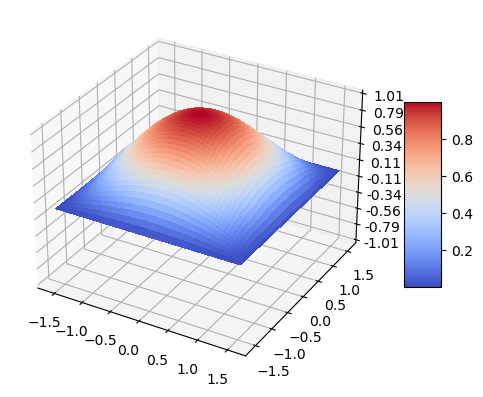

In [21]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
x = np.linspace(-np.pi/2, np.pi/2, 100)
y = np.linspace(-np.pi/2, np.pi/2, 100)
X, Y = np.meshgrid(x, y)
Z = numeric_function(X, Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z[0][0], cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [ ]:
from scipy.optimize import minimize_scalar

res = minimize_scalar(numeric_function(X, Y))

In [223]:
Z[0][0].shape

(100, 100)

In [222]:
X.shape

(100, 100)

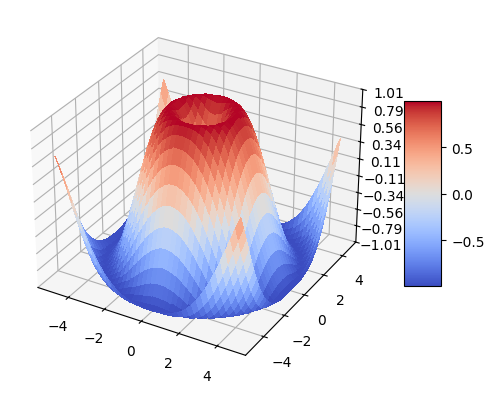

In [217]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()